<a href="https://colab.research.google.com/github/haniafayed/Face-Recognition/blob/main/FaceRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Imports


In [ ]:
from PIL import Image
from numpy import asarray
from sklearn.metrics import accuracy_score
import numpy as np
import glob
import cv2
import zipfile
import  os
from scipy.spatial import distance
from sklearn.neighbors import KNeighborsClassifier
from tabulate import tabulate
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import scipy


### **Data prepration**

In [ ]:
#extracting the ORL dataset
zip_ref = zipfile.ZipFile("archive (1).zip", "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
#saving data set in Data_matrix
y = []
Data_matrix = []
for i in range(1,41):
  folder = "s"
  folder+=str(i)
  y.append(i)
  files = glob.glob (folder)
  for j in range(1,11):
      file_name = folder + "/"+str(j)+".pgm"
      img = Image.open(file_name)
      data = np.array(img)
      #print(data)
      x = data.flatten()
      Data_matrix.append(x)
      #print(x.shape)
      #print("Path")
      #print(file_name)
      j=j+1
  j = 1
  i = i +1

In [ ]:
Data_matrix = np.array(Data_matrix)
print("Total data:")
print(Data_matrix.shape)
print(Data_matrix)

print("Labels:")
print(y)


Total data:
(400, 10304)
[[ 48  49  45 ...  47  46  46]
 [ 60  60  62 ...  32  34  34]
 [ 39  44  53 ...  29  26  29]
 ...
 [125 119 124 ...  36  39  40]
 [119 120 120 ...  89  94  85]
 [125 124 124 ...  36  35  34]]
Labels:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]


splitting the data 50-50:


In [ ]:
#splitting the data into 2 sets equally
Testing =  Data_matrix[::2] 
Training = Data_matrix[1::2]
print("Training")
print(Training)

print("Testing")
print(Testing)

Training_Labels=[]
Original_Testing_Labels=[]
for i in range(1,41):
  for j in range(1,6):
    Training_Labels.append(i)
    Original_Testing_Labels.append(i)

print("Training Labels:")
print(Training_Labels)

Training
[[ 60  60  62 ...  32  34  34]
 [ 63  53  35 ...  41  10  24]
 [ 43  50  41 ... 158 153 169]
 ...
 [123 121 126 ...  40  35  42]
 [125 119 124 ...  36  39  40]
 [125 124 124 ...  36  35  34]]
Testing
[[ 48  49  45 ...  47  46  46]
 [ 39  44  53 ...  29  26  29]
 [ 64  76  80 ...  35  37  39]
 ...
 [128 125 125 ...  85  90  84]
 [129 127 133 ...  93  93  93]
 [119 120 120 ...  89  94  85]]
Training Labels:
[1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 32, 32

### **PCA function:**


In [ ]:
def PCA(Training,Testing,Alpha):
  MeanMatrix=np.array(Training).mean(axis=0)
  #print("Mean Matrix: ")
  #print(MeanMatrix)
  #print("Mean Matrix shape: ")
  #print(MeanMatrix.shape)
  #print("\n *********************************** \n")
  #print("Centred Data: ")
  Centred_Data=np.array(Training-MeanMatrix)
  #print(Centred_Data)
  #print("\n *********************************** \n")
 # print("Covariance matrix: ")
  Covariance_Matrix=np.cov(Centred_Data.T,bias=True)
  #print(Covariance_Matrix)
  #print("\n *********************************** \n")
  Eigenvalues,EigenVectors=np.linalg.eigh(Covariance_Matrix)
  #print("Eigenvalues: ")
  #print(Eigenvalues)
  #print("\n *********************************** \n")
  #print("Eigenvectors: ")
  #print(EigenVectors)
  #print("\n *********************************** \n")
  #print("Sum of total EigenValues")
  SumEigenValues=Eigenvalues.sum()
  #print(SumEigenValues)
  idx = np.argsort(Eigenvalues)[::-1]
  Sorted_eigenValues= Eigenvalues[idx]
  #Sorted_eigenValues=np.diagflat(Sorted_eigenValues)
  Sorted_eigenvectors= EigenVectors[:,idx]
  FractionalSum=0 
  FractionalVariance=0
  index=0
  for i in range(0,len(Sorted_eigenValues)):
    FractionalVariance=FractionalSum / SumEigenValues
    if  FractionalVariance < Alpha :
      index=i
      FractionalSum+=Sorted_eigenValues[i]
    else:
      break
 
  #print("Fractional Variance")
  #print(FractionalVariance)
  #print("r= ",index+1)
          

  #print("\n *********************************** \n")
  Reduced_Eigenvectors=Sorted_eigenvectors[:, 0:index+1]
  Reduced_Eigenvalues= Sorted_eigenValues[0:index+1]
  #print("Reduced EigenVector= ")
  #print(Reduced_Eigenvectors)
  #print(Reduced_Eigenvectors.shape)
  #print("\n *********************************** \n")

  Reduced_EigenvectorsT=np.transpose(Reduced_Eigenvectors)
  #print("projection matrix= ")
  #print(Reduced_EigenvectorsT) 
#
  #print("\n *********************************** \n")
  #print("Projected Training matrix = ")
  projected_training=np.dot(Centred_Data,Reduced_Eigenvectors)
  #print(projected_training)

  #print("\n *********************************** \n")
  Temp_Testing=np.subtract(Testing,Testing.mean(axis=0))
  #print("Testing",Testing)
  #print("Temp_Testing",Temp_Testing)
  projected_testing=np.dot(Temp_Testing,Reduced_Eigenvectors)
  #print("Projected Testing matrix = ")
  #print(projected_testing)
  #print("\n *********************************** \n")
 
  return projected_training,projected_testing,Reduced_Eigenvectors,Reduced_Eigenvalues



In [ ]:
projected_training08,projected_testing08,Reduced_Eigenvectors08,Reduced_Eigenvalues08=PCA(Training,Testing,0.8)

In [ ]:

projected_training085,projected_testing085,Reduced_Eigenvectors085,Reduced_Eigenvalues085=PCA(Training,Testing,0.85)

In [ ]:

projected_training09,projected_testing09,Reduced_Eigenvectors09,Reduced_Eigenvalues09=PCA(Training,Testing,0.9)

In [ ]:

projected_training095,projected_testing095,Reduced_Eigenvectors095,Reduced_Eigenvalues095=PCA(Training,Testing,0.95)

In [ ]:
#classifier function
def Label_prediction(k,ProjectedTraining , ProjectedTesting):

  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(ProjectedTraining,np.array(Training_Labels))
  Tested_Labels= model.predict(ProjectedTesting)

  return Tested_Labels

In [ ]:
#output of predicted labels
print("Tested labels for 0.8=")
Tested_Labels08=Label_prediction (1,projected_training08,projected_testing08)
print(Tested_Labels08)

print("\n *********************************** \n")

print("Tested labels for 0.85=")
Tested_Labels085=Label_prediction (1,projected_training085,projected_testing085)
print(Tested_Labels085)

print("\n *********************************** \n")

print("Tested labels for 0.9=")
Tested_Labels09=Label_prediction (1,projected_training09,projected_testing09)
print(Tested_Labels09)

print("\n *********************************** \n")

print("Tested labels for 0.95=")
Tested_Labels095=Label_prediction (1,projected_training095,projected_testing095)
print(Tested_Labels095)

Tested labels for 0.8=
[16  2  1  1  1  2  2  2  2  2  3  3  3  3  3  4  4  4  4  4  5  5  5  5
  5  6  6  6  6  6  7  7  7  7  7  8  8  8  8  8  9  9  9  9  9 10 10 10
 10 38 11 11 11 11 11 12 12 12 12 12 13 13 13 13 13 14 14 14 14 14 15 15
 15 15 15 16 16 16 16 16 17 17 17 17 17 18 18 18 18 18 19 19 19 19 36 20
 20  3 20 20 21 21 21 21 21 22 22 22 22 22 23 23 23 23 23 24 24 24 24 24
 25 25 25 25 25 26 26 26 26 26 27 27 27 27 27 28 28 28 28 28 29 29 29 29
 29 30 30 30 30 30 31 31 31 21 31 32 32 32  2 32 33 33 33 33 33 34 34 34
 34 34 40 15 35 35 35  7 36  7 36 36 37 37 37 37 37 38 38 38 38 38 39 39
 39 39 39 40 40  5  5  5]

 *********************************** 

Tested labels for 0.85=
[16  2  1  1  1  2  2  2  2  2  3  3  3  3  3  4  4  4  4  4  5  5  5  5
  5  6  6  6  6  6  7  7  7  7  7  8  8  8  8  8  9  9  9  9  9 10 10 10
 10 38 11 11 11 11 11 12 12 12 12 12 13 13 13 13 13 14 14 14 14 14 15 15
 15 15 15 16 16 16 16 16 17 17 17 17 17 18 18 18 18 18 19 19 19 19 36 20
 20  3 20 2

In [ ]:
 print("Accuracy of 0.8 =")
 Accuracy08 = accuracy_score(Original_Testing_Labels, Tested_Labels08)
 print(Accuracy08*100,"%")

 print("Accuracy of 0.85 =")
 Accuracy085 = accuracy_score(Original_Testing_Labels, Tested_Labels085)
 print(Accuracy085*100,"%")  

 print("Accuracy of 0.9 =")
 Accuracy09 = accuracy_score(Original_Testing_Labels, Tested_Labels09)
 print(Accuracy09*100,"%")

 print("Accuracy of 0.95 =")
 Accuracy095= accuracy_score(Original_Testing_Labels, Tested_Labels095)
 print(Accuracy095*100,"%")

Accuracy of 0.8 =
93.0 %
Accuracy of 0.85 =
93.5 %
Accuracy of 0.9 =
94.0 %
Accuracy of 0.95 =
93.5 %



### **LDA**





In [ ]:
#1
ListOfClasses=[]
for i in range(0,40):
  ListOfClasses.append(Training[5*i:5*(i+1),:])

def LDA1(Training, ListOfClasses):

  #print(ListOfClasses)
  #2
  ListOfMeans=[]
  for i in range(len(ListOfClasses)):
    ListOfMeans.append(np.array(ListOfClasses[i]).mean(axis=0))

  print("List of means length : ",len(ListOfMeans))  
  print("List of means : ",ListOfMeans)

  #3
  OverallMean=np.array(Training).mean(axis=0)
  print("Overall mean =",OverallMean)
  Sb=np.zeros((10304,10304))
  for i in range(len(ListOfMeans)):
    expression=(np.outer((ListOfMeans[i]-OverallMean),np.array((ListOfMeans[i]-OverallMean)).T))
    Sb=Sb+ expression
  Sb=5*Sb  
  print("sb= ",Sb)

  #4
  ListOfCentredData=[]
  for i in range(len(ListOfClasses)):
    ListOfCentredData.append(ListOfClasses[i]-np.array(ListOfMeans[i]).T)

  print("List of centred data ",ListOfCentredData)

  #5
  ListOfScatterMatrcies=np.zeros((10304,10304))
  for j in range(len(ListOfCentredData)):
   expression=np.dot(np.array(ListOfCentredData[j]).T,np.array(ListOfCentredData[j]))
   ListOfScatterMatrcies=ListOfScatterMatrcies+expression

  print("S= ",ListOfScatterMatrcies.shape)
  print(ListOfScatterMatrcies)

  return ListOfScatterMatrcies, Sb 



In [ ]:
def LDA2(ListOfScatterMatrcies):
  inv=scipy.linalg.pinvh(ListOfScatterMatrcies)
  print(inv)
  return inv

In [ ]:
def LDA3(inv,Sb):
  s_1_b=np.dot(inv,Sb)
  print(s_1_b)
  return s_1_b


In [ ]:
def LDA4(s_1_b):
  EigenValues,EigenVector=np.linalg.eig(s_1_b)
  print(EigenValues.shape)
  print(EigenValues)
  print(EigenVector.shape)
  print(EigenVector)

  EigenVector = np.real(EigenVector)
  EigenValues = np.real(EigenValues)

  idx = np.argsort(EigenValues)[::-1]
  Sorted_eigenValues= EigenValues[idx]
  Sorted_eigenvectors= EigenVector[:,idx]


  return Sorted_eigenvectors, Sorted_eigenValues


In [ ]:
ListOfScatterMatrcies, Sb = LDA1(Training,ListOfClasses)
inv = LDA2(ListOfScatterMatrcies)
s_1_b = LDA3(inv, Sb)
Sorted_eigenvectors, Sorted_eigenValues = LDA4(s_1_b)

List of means length :  40
List of means :  [array([48.8, 48. , 40.6, ..., 62.2, 56. , 59.4]), array([35.2, 35.8, 35.6, ..., 71.8, 71.6, 71.6]), array([105.2, 104. , 107.4, ...,  50. ,  48.4,  50. ]), array([118.6, 118.8, 118. , ...,  70.8,  69.4,  69.2]), array([128.8, 129. , 127.8, ...,  72.6,  71.8,  72.8]), array([153.4, 152.8, 152.2, ..., 103.6, 103.8, 103. ]), array([56.6, 57.2, 57.6, ..., 64. , 65. , 65.4]), array([122. , 118.6, 119.8, ...,  59.8,  56.8,  59. ]), array([109.8, 111.4, 110.4, ...,  84. ,  82.4,  83.2]), array([134.2, 130. , 132.6, ...,  26. ,  30.4,  32.4]), array([46.4, 47. , 46.4, ..., 34. , 34. , 37.6]), array([104.6, 106. , 105.4, ...,  38.8,  40.6,  33. ]), array([107.6, 109.2, 108. , ...,  20.6,  25.8,  23.8]), array([ 45.8,  47.2,  46.8, ..., 142.2, 142.6, 123.4]), array([72.4, 72.2, 71.4, ..., 71.8, 49. , 54. ]), array([60. , 59. , 61.4, ..., 64.6, 64.6, 60.4]), array([49.4, 49.6, 51.4, ..., 42.2, 46.8, 46. ]), array([121.2, 120.6, 122.2, ...,  73.6,  74. 

In [ ]:
Reduced_Dimensions=Sorted_eigenvectors[0:39]


LDAProjectionMatrix=Reduced_Dimensions.T
print(LDAProjectionMatrix)


[[ 0.00195963  0.00368616 -0.00057438 ... -0.01705653 -0.01404106
  -0.00977054]
 [-0.00656164 -0.0035659  -0.0071894  ... -0.01078281 -0.00610519
   0.0081349 ]
 [-0.00088356  0.00082478 -0.00175051 ...  0.01172772  0.00515272
   0.00499746]
 ...
 [ 0.07414323 -0.00509736 -0.00217413 ...  0.00893063  0.00254027
   0.00914785]
 [-0.0271418  -0.04480166 -0.01277445 ... -0.02089576 -0.00391942
  -0.00489543]
 [ 0.00079257  0.01504093 -0.04692723 ... -0.01893114  0.00889898
  -0.00279428]]


In [ ]:
LDAProjectedTraining=np.dot(Training,LDAProjectionMatrix)
print(LDAProjectedTraining)
print(LDAProjectedTraining.shape)
LDAProjectedTesting=np.dot(Testing,LDAProjectionMatrix)
print(LDAProjectedTesting)
print(LDAProjectedTesting.shape)

[[ 352.54193968  103.22486226   70.53467092 ...  -36.63643769
  -156.123557    269.49188869]
 [ 268.78352643   76.12616493   71.53280574 ...  -31.82255498
  -158.5050567   215.23568458]
 [ 296.94984497   96.25901802   54.47069154 ...  -14.7905745
  -159.46332048  266.88120364]
 ...
 [ 205.92602612   87.43362244   51.09296202 ...  -22.89396053
  -138.01056429  249.58232478]
 [ 232.20780489   77.25346317   48.98234808 ...  -32.50593734
  -135.55883492  247.22255273]
 [ 215.61304803   82.51275749   50.15653453 ...  -50.7864228
  -105.51335252  226.39444263]]
(200, 39)
[[ 287.42543554  107.59279396   55.2087673  ...   29.95465429
  -129.13038683  269.75650721]
 [ 303.92085868  102.58637357   59.97800946 ...   14.27334893
  -134.17211394  265.49997961]
 [ 217.56721206   56.84816439   73.61276135 ...   -4.4388712
  -149.37496587  240.89740036]
 ...
 [ 260.20326962   83.1852289    54.68668266 ...  -13.31521876
  -131.06782849  236.66698238]
 [ 265.04223667   84.65013552   49.67827098 ...  -30

In [ ]:
LDAPredictedLabels=Label_prediction(1,LDAProjectedTraining,LDAProjectedTesting)
print(LDAPredictedLabels)


[ 2  5  1  1  1  2  2  2  2 16  3  3  3  3  3  4  4  4  4  4  5  5  5  5
  5  6  6  6  6  6  7  7  7  7  7  8  8  8  8  8  9  9  9  9  9 10 10 10
 10 10 11 11 11 11 11 12 12 12 12 12 13 13 13 13 26 14 14 14 14 14 15 15
 15 15 15 16 16 16 16 16 17 17 17 17 17 18 18 18 18 18 19 19 19 19  2 20
 20 20 20 20 21 21 21 21 21 22 22 22 22 22 23 23 23 23 23 24 24 24 24 24
 25 25 25 25 25 26 26 26 26 26 27 27 27 27 27 28 28 28 37 37 29 29 29 29
 33 30 30 30 30 30 31 31 31 33 31 32 32 32  3 32 21 33 33 33 33 34 34 34
 34 34 15 35  5 35 35  7 36  7 36 36 37 37 37 28 37 38 21 38 38 38 39 39
 39 39 39 40 40  5  5  5]


In [ ]:
LDA_Accuracy1 = accuracy_score(Original_Testing_Labels, LDAPredictedLabels)
print("Accuracy1 = ",LDA_Accuracy1*100, "%")

Accuracy1 =  90.0 %


### **Classfier tunning**

In [ ]:
AccuracyLDA=[]

AccuracyLDA.append([1,LDA_Accuracy1])

#Label prediction for diffrent values of K

LDAPredictedLabels3=Label_prediction(3,LDAProjectedTraining,LDAProjectedTesting)
LDA_Accuracy3 = accuracy_score(Original_Testing_Labels, LDAPredictedLabels3)
AccuracyLDA.append([3,LDA_Accuracy3])
print(LDAPredictedLabels3)

print("\n *********************************** \n")

LDAPredictedLabels5=Label_prediction(5,LDAProjectedTraining,LDAProjectedTesting)
LDA_Accuracy5 = accuracy_score(Original_Testing_Labels, LDAPredictedLabels5)
AccuracyLDA.append([5,LDA_Accuracy5])
print(LDAPredictedLabels5)

print("\n *********************************** \n")

LDAPredictedLabels7=Label_prediction(7,LDAProjectedTraining,LDAProjectedTesting)
LDA_Accuracy7 = accuracy_score(Original_Testing_Labels, LDAPredictedLabels7)
AccuracyLDA.append([7,LDA_Accuracy7])
print(LDAPredictedLabels7)



[ 2  1  1  1  1  2  2  2  2  2  3  3  4  3  3  4  4  4  4  4  5  5  5  5
  5  6  6  6  6  6  7  7  7  7  7  8  8  8  8  8  9  9  9  9  9 38 10 10
 10 10 11 11 11 11 11 12  3 12 12 12 13 13 13 13 13 14 14 14 14 14 15 15
 15 15 15  2 16  1 16 16  4 17  3 17 17 18 18 18 18 18 19 19 19 19 32 20
 20 20 20 20 21 21  9 21 21 22 22 22 22 22 23 23 23 23 23 24 17 24 24 24
 25 25 25 25 25 26 26 26 28 26 27 27 27 27 27  3 28 37 28 37 29 29 29 29
 33 30 30 30 30 30  9 31 31 21 31 32 32  1  3 32 15 33 23 33 33 34 34 34
 31 34  9 15  5 25  1  7 36  7 36 17 28 13 37 28 13 23  3 38 38 38 39 39
 39 39 39  5  5  5  5  5]

 *********************************** 

[ 2  5  1  1  1  2  2  2  2  2  3  3  4  3  3  4  4  4  4 25  5  5  5  5
  5  6  6  6  6  6  7  7  7  7  7  8  8  8  8  8  9  9  9  9  9 38 10 10
 10 38 11 11  2 11 11 12 12 12 12 12 13 13 13 13 26 14 14 14 14 14 15 15
 15  9 15 27  2  1 16 16  4 17 17 17 17 18 18 18 18 18 19 19 19 19  2 20
 20 20 20 20 21 21  9 23 21 22 22 22 22 22 38 23 23 23 23 

In [ ]:

print (tabulate(AccuracyLDA, headers=["K", "Accuracy"]))


  K    Accuracy
---  ----------
  1       0.9
  3       0.79
  5       0.78
  7       0.725


In [ ]:
#Label prediction for diffrent values of K

PCAPredictedLabels08=[]
PCAPredictedLabels085=[]
PCAPredictedLabels09=[]
PCAPredictedLabels095=[]
PCA_Accuracy08=[]
PCA_Accuracy085=[]
PCA_Accuracy09=[]
PCA_Accuracy095=[]
K=[1,3,5,7]
for i in range(0,4):
  PCAPredictedLabels08.append(Label_prediction(K[i],projected_training08,projected_testing08))
  PCAPredictedLabels085.append(Label_prediction(K[i],projected_training085,projected_testing085))
  PCAPredictedLabels09.append(Label_prediction(K[i],projected_training09,projected_testing09))
  PCAPredictedLabels095.append(Label_prediction(K[i],projected_training095,projected_testing095))
for i in range(0,4):
  PCA_Accuracy08.append([K[i],accuracy_score(Original_Testing_Labels, PCAPredictedLabels08[i])])
  PCA_Accuracy085.append([K[i],accuracy_score(Original_Testing_Labels, PCAPredictedLabels085[i])])
  PCA_Accuracy09.append([K[i],accuracy_score(Original_Testing_Labels, PCAPredictedLabels09[i])])
  PCA_Accuracy095.append([K[i],accuracy_score(Original_Testing_Labels, PCAPredictedLabels095[i])])





print("Classifying accuracy with respect to k for PCA (Alpha=0.8) \n")
print (tabulate(PCA_Accuracy08, headers=["K", "Accuracy"]))

print("\n Classifying accuracy with respect to k for PCA (Alpha=0.85) \n")
print (tabulate(PCA_Accuracy085, headers=["K", "Accuracy"]))

print("\n Classifying accuracy with respect to k for PCA (Alpha=0.9) \n")
print (tabulate(PCA_Accuracy09, headers=["K", "Accuracy"]))

print("\n Classifying accuracy with respect to k for PCA (Alpha=0.95) \n")
print (tabulate(PCA_Accuracy095, headers=["K", "Accuracy"]))

Classifying accuracy with respect to k for PCA (Alpha=0.8) 

  K    Accuracy
---  ----------
  1        0.93
  3        0.85
  5        0.82
  7        0.78

 Classifying accuracy with respect to k for PCA (Alpha=0.85) 

  K    Accuracy
---  ----------
  1       0.935
  3       0.855
  5       0.835
  7       0.77

 Classifying accuracy with respect to k for PCA (Alpha=0.9) 

  K    Accuracy
---  ----------
  1       0.94
  3       0.845
  5       0.815
  7       0.75

 Classifying accuracy with respect to k for PCA (Alpha=0.95) 

  K    Accuracy
---  ----------
  1       0.935
  3       0.85
  5       0.81
  7       0.73


### **Non-Faces/Faces**

In [ ]:
FacesDataset=Data_matrix[0:100,:]
#print(FacesDataset.shape)

zip_ref = zipfile.ZipFile("non-faces.zip", "r")
zip_ref.extractall()
zip_ref.close()

NonFacesDataset=[]

for i in os.listdir("/content/non-faces pgm"):
      file_name = "/content/non-faces pgm/"+i
      img = Image.open(file_name)
      data = np.array(img)
      x = data.flatten()
      NonFacesDataset.append(x)
     # print(x.shape)
      #print("Path")
      #print(file_name)
 



In [ ]:
FaceTesting = np.concatenate((Testing[0:50], NonFacesDataset[0:50]), axis=0)

FaceTraining = np.concatenate((Training[0:50], NonFacesDataset[50:100]), axis=0)

print("Training")
print(FaceTraining)
print("Shape")
print(FaceTraining.shape)

print("Testing")
print(FaceTesting)
print("Shape")
print(FaceTesting.shape)

Faces_NonFaces_Labels = np.concatenate((np.zeros(50), np.ones(50)), axis=0)

print(Faces_NonFaces_Labels)



Training
[[ 60  60  62 ...  32  34  34]
 [ 63  53  35 ...  41  10  24]
 [ 43  50  41 ... 158 153 169]
 ...
 [235 250 227 ...  95  97  86]
 [ 16  16  16 ...  36  35  34]
 [208 208 207 ... 223 230 235]]
Shape
(100, 10304)
Testing
[[ 48  49  45 ...  47  46  46]
 [ 39  44  53 ...  29  26  29]
 [ 64  76  80 ...  35  37  39]
 ...
 [178 178 178 ...  35  62  89]
 [151 148 148 ... 200 195 192]
 [ 48  58  67 ...  72  74  76]]
Shape
(100, 10304)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


In [ ]:
projected_training08_2,projected_testing08_2,Reduced_Eigenvectors08_2,Reduced_Eigenvalues08_2 =PCA(FaceTraining,FaceTesting,0.8)

In [ ]:
projected_training085_2,projected_testing085_2,Reduced_Eigenvectors085_2,Reduced_Eigenvalues085_2 =PCA(FaceTraining,FaceTesting,0.85)

In [ ]:
projected_training09_2,projected_testing09_2,Reduced_Eigenvectors09_2,Reduced_Eigenvalues09_2 =PCA(FaceTraining,FaceTesting,0.9)

In [ ]:
projected_training095_2,projected_testing095_2,Reduced_Eigenvectors095_2,Reduced_Eigenvalues095_2 =PCA(FaceTraining,FaceTesting,0.95)

In [ ]:
def Label_prediction2(k,ProjectedTraining , ProjectedTesting):

  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(ProjectedTraining,np.array(Faces_NonFaces_Labels))
  Tested_Labels= model.predict(ProjectedTesting)

  return Tested_Labels

In [ ]:
print("Tested labels for 0.8=")
Tested_Labels08_2=Label_prediction2 (1,projected_training08_2,projected_testing08_2)
print(Tested_Labels08_2)

print(" ***********************************")
print("Tested labels for 0.85=")
Tested_Labels085_2=Label_prediction2 (1,projected_training085_2,projected_testing085_2)
print(Tested_Labels085_2)

print(" ***********************************")

print("Tested labels for 0.9=")
Tested_Labels09_2=Label_prediction2 (1,projected_training09_2,projected_testing09_2)
print(Tested_Labels09_2)

print(" ***********************************")

print("Tested labels for 0.95=")
Tested_Labels095_2=Label_prediction2 (1,projected_training095_2,projected_testing095_2)
print(Tested_Labels095_2)

print(" ***********************************")

Tested labels for 0.8=
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 0. 1. 0.]
 ***********************************
Tested labels for 0.85=
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 0. 1. 0.]
 ***********************************
Tested labels for 0.9=
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 0. 1. 1. 

In [ ]:
ListOfAccuracies = []

print("Accuracy of 0.8 =")
Accuracy08_2 = accuracy_score(Faces_NonFaces_Labels, Tested_Labels08_2)
ListOfAccuracies.append([100,Accuracy08_2])
print(Accuracy08_2*100,"%")

print("Accuracy of 0.85 =")
Accuracy085_2 = accuracy_score(Faces_NonFaces_Labels, Tested_Labels085_2)
print(Accuracy085_2*100,"%")

print("Accuracy of 0.9 =")
Accuracy09_2 = accuracy_score(Faces_NonFaces_Labels, Tested_Labels09_2)
print(Accuracy09_2*100,"%")

print("Accuracy of 0.95 =")
Accuracy095_2 = accuracy_score(Faces_NonFaces_Labels, Tested_Labels095_2)
print(Accuracy095_2*100,"%")

Accuracy of 0.8 =
91.0 %
Accuracy of 0.85 =
90.0 %
Accuracy of 0.9 =
90.0 %
Accuracy of 0.95 =
88.0 %


Failure cases when Alpha = 0.8


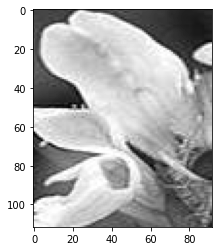

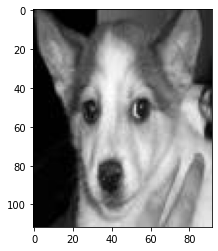

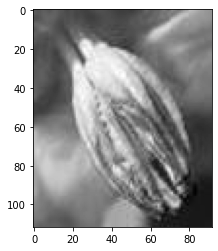

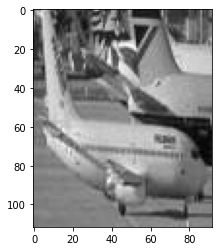

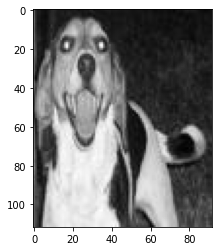

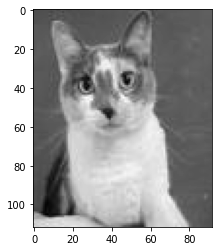

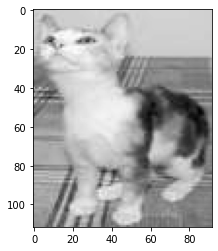

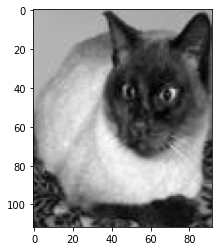

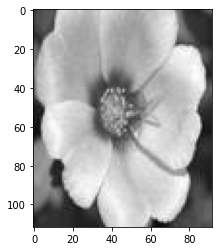

<Figure size 432x288 with 0 Axes>

In [ ]:
print("Failure cases when Alpha = 0.8")

for i in range(len(Tested_Labels08_2)):
  if Tested_Labels08_2[i] != Faces_NonFaces_Labels[i]:
    data1 = FaceTesting[i].reshape(112, 92)
    plt.imshow(data1, cmap='gray');
    plt.figure()


Failure cases when Alpha = 0.85


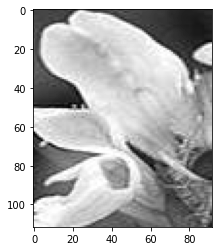

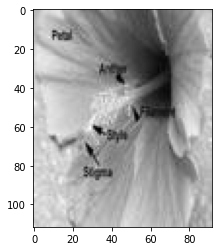

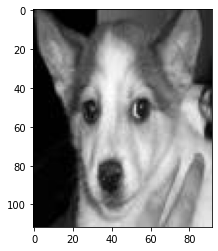

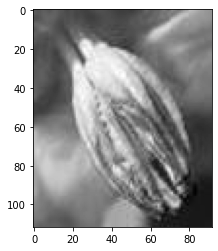

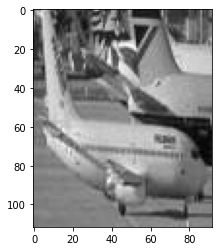

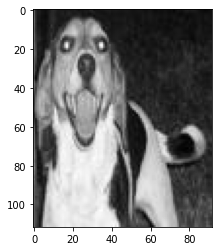

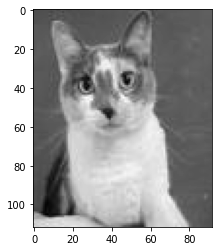

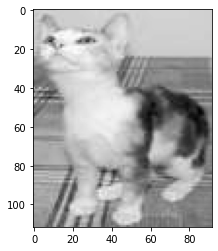

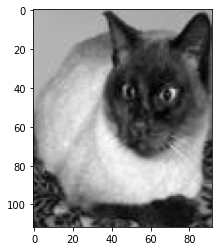

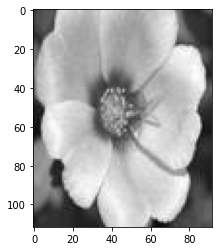

<Figure size 432x288 with 0 Axes>

In [ ]:
print("Failure cases when Alpha = 0.85")

for i in range(len(Tested_Labels085_2)):
  if Tested_Labels085_2[i] != Faces_NonFaces_Labels[i]:
    data2 = FaceTesting[i].reshape(112, 92)
    plt.imshow(data2, cmap='gray');
    plt.figure()

Failure cases when Alpha = 0.9


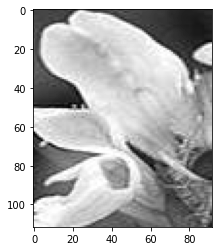

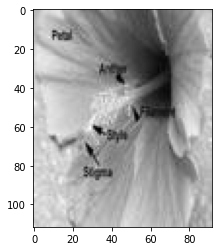

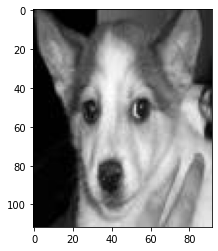

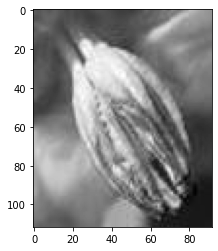

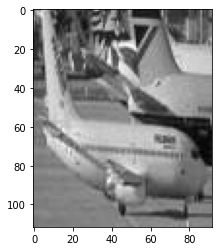

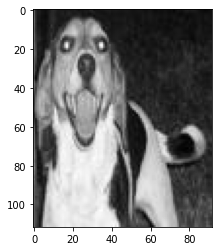

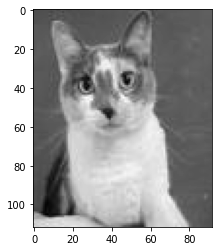

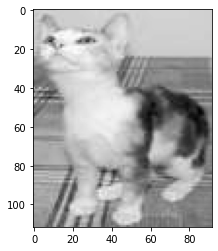

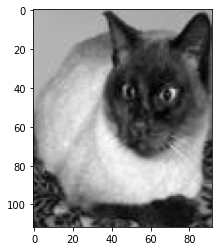

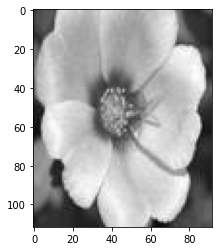

<Figure size 432x288 with 0 Axes>

In [ ]:
print("Failure cases when Alpha = 0.9")

for i in range(len(Tested_Labels09_2)):
  if Tested_Labels09_2[i] != Faces_NonFaces_Labels[i]:
    data3 = FaceTesting[i].reshape(112, 92)
    plt.imshow(data3, cmap='gray');
    plt.figure()

Failure cases when Alpha = 0.95


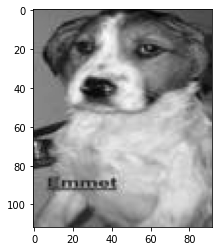

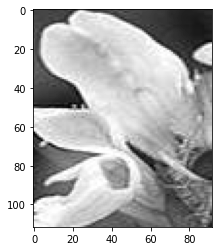

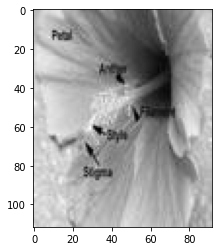

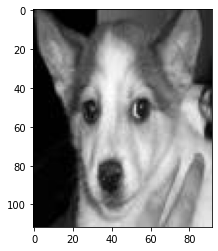

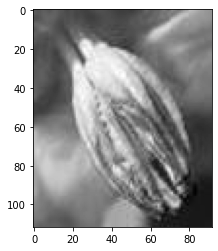

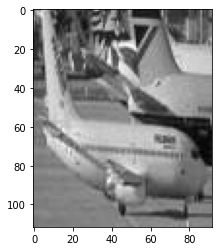

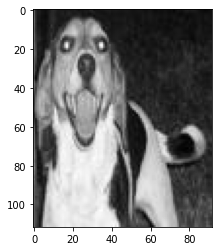

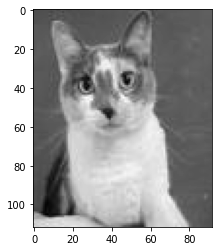

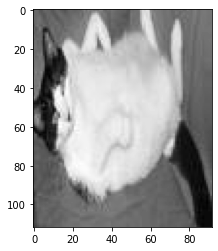

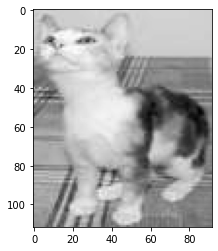

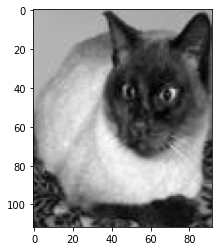

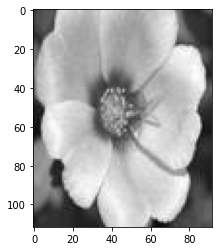

<Figure size 432x288 with 0 Axes>

In [ ]:
print("Failure cases when Alpha = 0.95")

for i in range(len(Tested_Labels095_2)):
  if Tested_Labels095_2[i] != Faces_NonFaces_Labels[i]:
    data4 = FaceTesting[i].reshape(112, 92)
    plt.imshow(data4, cmap='gray');
    plt.figure()

In [ ]:
ListofClasses = []
ListofClasses.append(FaceTraining[0:50])
ListofClasses.append(FaceTraining[50:100])
print(np.array(ListofClasses).shape)
ListOfScatterMatrcies_2, Sb_2 = LDA1(FaceTraining, ListofClasses)
print("Scatter List")
print(ListOfScatterMatrcies_2)
print("Sb")
print(Sb_2)


(2, 50, 10304)
List of means length :  2
List of means :  [array([101.26, 100.56, 100.2 , ...,  66.48,  65.56,  66.6 ]), array([ 94.52,  97.2 ,  99.52, ..., 100.62, 100.4 , 101.7 ])]
Overall mean = [97.89 98.88 99.86 ... 83.55 82.98 84.15]
sb=  [[ 1.135690e+02  5.661600e+01  1.145800e+01 ... -5.752590e+02
  -5.870540e+02 -5.914350e+02]
 [ 5.661600e+01  2.822400e+01  5.712000e+00 ... -2.867760e+02
  -2.926560e+02 -2.948400e+02]
 [ 1.145800e+01  5.712000e+00  1.156000e+00 ... -5.803800e+01
  -5.922800e+01 -5.967000e+01]
 ...
 [-5.752590e+02 -2.867760e+02 -5.803800e+01 ...  2.913849e+03
   2.973594e+03  2.995785e+03]
 [-5.870540e+02 -2.926560e+02 -5.922800e+01 ...  2.973594e+03
   3.034564e+03  3.057210e+03]
 [-5.914350e+02 -2.948400e+02 -5.967000e+01 ...  2.995785e+03
   3.057210e+03  3.080025e+03]]
List of centred data  [array([[-41.26, -40.56, -38.2 , ..., -34.48, -31.56, -32.6 ],
       [-38.26, -47.56, -65.2 , ..., -25.48, -55.56, -42.6 ],
       [-58.26, -50.56, -59.2 , ...,  91.52,

In [ ]:
inv_2 = LDA2(ListOfScatterMatrcies_2)


[[ 1.76997144e-09  1.00733702e-09  6.00979462e-10 ... -7.89731982e-11
  -1.80879665e-11 -1.42920594e-10]
 [ 1.00733702e-09  9.95672770e-10  7.99897897e-10 ...  5.06173321e-11
   6.07254677e-11 -7.99724034e-11]
 [ 6.00979462e-10  7.99897897e-10  9.31903372e-10 ...  1.48030506e-11
   6.77309242e-12 -9.81421478e-11]
 ...
 [-7.89731982e-11  5.06173321e-11  1.48030506e-11 ...  1.88566109e-09
   2.12751696e-09  1.98728433e-09]
 [-1.80879665e-11  6.07254677e-11  6.77309242e-12 ...  2.12751696e-09
   2.63890239e-09  2.45513065e-09]
 [-1.42920594e-10 -7.99724034e-11 -9.81421478e-11 ...  1.98728433e-09
   2.45513065e-09  2.46966887e-09]]


In [ ]:
s_1_b_2 = LDA3(inv_2, Sb_2)

[[-1.81938080e-05 -9.06991020e-06 -1.83557707e-06 ...  9.21567662e-05
   9.40463308e-05  9.47481691e-05]
 [-1.89488298e-05 -9.44630092e-06 -1.91175138e-06 ...  9.59811647e-05
   9.79491441e-05  9.86801078e-05]
 [-1.44598106e-06 -7.20845157e-07 -1.45885329e-07 ...  7.32430168e-06
   7.47447776e-06  7.53025744e-06]
 ...
 [ 2.76338896e-05  1.37759450e-05  2.78798887e-06 ... -1.39973441e-04
  -1.42843430e-04 -1.43909425e-04]
 [ 3.90575370e-05  1.94708196e-05  3.94052302e-06 ... -1.97837435e-04
  -2.01893856e-04 -2.03400527e-04]
 [ 4.38479274e-05  2.18589074e-05  4.42382651e-06 ... -2.22102113e-04
  -2.26656052e-04 -2.28347515e-04]]


In [ ]:
Sorted_eigenvectors_2, Sorted_eigenValues_2 = LDA4(s_1_b_2)

(10304,)
[ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  4.08475178e-01+0.00000000e+00j ... -4.53055508e-22-2.62585836e-22j
  6.00945924e-22+0.00000000e+00j  1.03956588e-22+0.00000000e+00j]
(10304, 10304)
[[ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   6.88986718e-03+0.00000000e+00j ... -1.28823602e-06+1.32830802e-06j
   2.45862673e-04+0.00000000e+00j -4.23388590e-05+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   7.17578865e-03+0.00000000e+00j ...  2.82587846e-05+2.96863067e-05j
  -3.65926604e-04+0.00000000e+00j -3.18072009e-05+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   5.47582862e-04+0.00000000e+00j ... -1.82432125e-03+1.08266118e-03j
   1.42685978e-03+0.00000000e+00j -1.44225343e-03+0.00000000e+00j]
 ...
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  -1.04647597e-02+0.00000000e+00j ... -1.36731447e-06+4.86325373e-06j
   1.34352153e-05+0.000000

In [ ]:
Reduced_Dimensions2=Sorted_eigenvectors_2[0:39]
LDAProjectionMatrix2=Reduced_Dimensions2.T
#print(LDAProjectionMatrix2)

LDAProjectedTraining2=np.dot(FaceTraining,LDAProjectionMatrix2)
#print(LDAProjectedTraining2)
#print(LDAProjectedTraining2.shape)

LDAProjectedTesting2=np.dot(FaceTesting,LDAProjectionMatrix2)
#print(LDAProjectedTesting2)
#print(LDAProjectedTesting2.shape)

LDAPredictedLabels2=Label_prediction2(1,LDAProjectedTraining2,LDAProjectedTesting2)
#print(LDAPredictedLabels2)

LDA_Accuracy_2 = accuracy_score(Faces_NonFaces_Labels, LDAPredictedLabels2)
print("Accuracy = ",LDA_Accuracy_2*100, "%")


Accuracy =  85.0 %


In [ ]:
#Changing the ratio between the faces and the non-faces dataset
zip_ref = zipfile.ZipFile("non_faces_1.zip", "r")
zip_ref.extractall()
zip_ref.close()
zip_ref = zipfile.ZipFile("non_faces_2.zip", "r")
zip_ref.extractall()
zip_ref.close()
zip_ref = zipfile.ZipFile("non_faces_3.zip", "r")
zip_ref.extractall()
zip_ref.close()
zip_ref = zipfile.ZipFile("non_faces_4.zip", "r")
zip_ref.extractall()
zip_ref.close()
zip_ref = zipfile.ZipFile("non_faces_5.zip", "r")
zip_ref.extractall()
zip_ref.close()

NonFaces20_1 = []
NonFaces20_2 = []
NonFaces20_3 = []
NonFaces20_4 = []
NonFaces20_5 = []

for i in os.listdir("/content/non_faces_1"):
      file_name = "/content/non_faces_1/"+i
      img = Image.open(file_name)
      data = np.array(img)
      x = data.flatten()
      NonFaces20_1.append(x)

for i in os.listdir("/content/non_faces_2"):
      file_name = "/content/non_faces_2/"+i
      img = Image.open(file_name)
      data = np.array(img)
      x = data.flatten()
      NonFaces20_2.append(x)

for i in os.listdir("/content/non_faces_3"):
      file_name = "/content/non_faces_3/"+i
      img = Image.open(file_name)
      data = np.array(img)
      x = data.flatten()
      NonFaces20_3.append(x)

for i in os.listdir("/content/non_faces_4"):
      file_name = "/content/non_faces_4/"+i
      img = Image.open(file_name)
      data = np.array(img)
      x = data.flatten()
      NonFaces20_4.append(x)

for i in os.listdir("/content/non_faces_5"):
      file_name = "/content/non_faces_5/"+i
      img = Image.open(file_name)
      data = np.array(img)
      x = data.flatten()
      NonFaces20_5.append(x)

FaceTesting1 = np.concatenate((FaceTesting, NonFaces20_1[0:10]), axis=0)
FaceTraining1 = np.concatenate((FaceTraining, NonFaces20_1[10:20]), axis=0)

FaceTesting2 = np.concatenate((FaceTesting, NonFaces20_2[0:20]), axis=0)
FaceTraining2 = np.concatenate((FaceTraining, NonFaces20_2[20:40]), axis=0)

FaceTesting3 = np.concatenate((FaceTesting, NonFaces20_3[0:30]), axis=0)
FaceTraining3 = np.concatenate((FaceTraining, NonFaces20_3[30:60]), axis=0)

FaceTesting4 = np.concatenate((FaceTesting, NonFaces20_4[0:40]), axis=0)
FaceTraining4 = np.concatenate((FaceTraining, NonFaces20_4[40:80]), axis=0)

FaceTesting5 = np.concatenate((FaceTesting, NonFaces20_5[0:50]), axis=0)
FaceTraining5 = np.concatenate((FaceTraining, NonFaces20_5[50:100]), axis=0)

Label1 = np.concatenate((np.zeros(50), np.ones(60)), axis=0)
Label2 = np.concatenate((np.zeros(50), np.ones(70)), axis=0)
Label3 = np.concatenate((np.zeros(50), np.ones(80)), axis=0)
Label4 = np.concatenate((np.zeros(50), np.ones(90)), axis=0)
Label5 = np.concatenate((np.zeros(50), np.ones(100)), axis=0)
  

In [ ]:
projected_training08_3,projected_testing08_3,Reduced_Eigenvectors08_3,Reduced_Eigenvalues08_3 =PCA(FaceTraining1,FaceTesting1,0.8)

In [ ]:
def Label_prediction3(k,ProjectedTraining , ProjectedTesting, Labels):

  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(ProjectedTraining,np.array(Labels))
  Tested_Labels= model.predict(ProjectedTesting)

  return Tested_Labels

In [ ]:
Tested_Labels08_3=Label_prediction3 (1,projected_training08_3,projected_testing08_3, Label1)

In [ ]:
Accuracy08_3 = accuracy_score(Label1, Tested_Labels08_3)
ListOfAccuracies.append([120,Accuracy08_3])

In [ ]:
projected_training08_4,projected_testing08_4,Reduced_Eigenvectors08_4,Reduced_Eigenvalues08_4 =PCA(FaceTraining2,FaceTesting2,0.8)

In [ ]:
Tested_Labels08_4=Label_prediction3 (1,projected_training08_4,projected_testing08_4, Label2)

In [ ]:
Accuracy08_4 = accuracy_score(Label2, Tested_Labels08_4)
ListOfAccuracies.append([140,Accuracy08_4])

In [ ]:
projected_training08_5,projected_testing08_5,Reduced_Eigenvectors08_5,Reduced_Eigenvalues08_5 =PCA(FaceTraining3,FaceTesting3,0.8)

In [ ]:
Tested_Labels08_5=Label_prediction3 (1,projected_training08_5,projected_testing08_5, Label3)

In [ ]:
Accuracy08_5 = accuracy_score(Label3, Tested_Labels08_5)
ListOfAccuracies.append([160,Accuracy08_5])

In [ ]:
projected_training08_6,projected_testing08_6,Reduced_Eigenvectors08_6,Reduced_Eigenvalues08_6 =PCA(FaceTraining4,FaceTesting4,0.8)

In [ ]:
Tested_Labels08_6=Label_prediction3 (1,projected_training08_6,projected_testing08_6, Label4)

In [ ]:
Accuracy08_6 = accuracy_score(Label4, Tested_Labels08_6)
ListOfAccuracies.append([180,Accuracy08_6])

In [ ]:
projected_training08_7,projected_testing08_7,Reduced_Eigenvectors08_7,Reduced_Eigenvalues08_7 =PCA(FaceTraining5,FaceTesting5,0.8)

In [ ]:
Tested_Labels08_7=Label_prediction3 (1,projected_training08_7,projected_testing08_7, Label5)

In [ ]:
Accuracy08_7 = accuracy_score(Label5, Tested_Labels08_7)
ListOfAccuracies.append([200,Accuracy08_7])

In [ ]:
print(ListOfAccuracies)

[[100, 0.91], [120, 0.9272727272727272], [120, 0.9272727272727272], [140, 0.925], [160, 0.9153846153846154], [180, 0.9357142857142857], [200, 0.9333333333333333]]


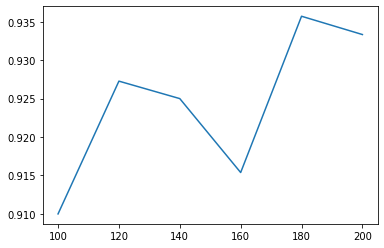

In [ ]:
plt.plot((np.array(ListOfAccuracies).T)[0],(np.array(ListOfAccuracies).T)[1])
plt.xlabel("Number of Non-faces images")
plt.ylabel("Accuracy")

### Bonus:


In [ ]:
#Splitting the faces dataset unequally to 70(training)-30(testing)
Testing30 = np.zeros((120,10304))
Training70 = np.zeros((280,10304))
Listofclasses = []
j=0
k=0
for i in range(0,400,10):
  Listofclasses.append(Data_matrix[i:i+7,:])
  Training70[j:j+7,:]=Data_matrix[i:i+7,:]
  Testing30[k:k+3,:]=Data_matrix[i+7:i+10,:]
  j=j+7
  k=k+3
print(np.array(Listofclasses).shape)
print(np.array(Training70).shape)
print(np.array(Testing30).shape)  
####Labels
Training_Labels70=[]
Testing_Labels30=[]
Original_Testing_Labels=[]
for i in range(1,41):
  for j in range(1,8):
    Training_Labels70.append(i)
print("Training Labels:")
for i in range(1,41):
  for j in range(1,4):
    Testing_Labels30.append(i)

print(Training_Labels70)
print(Testing_Labels30)

(40, 7, 10304)
(280, 10304)
(120, 10304)
Training Labels:
[1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 36, 

PCA:


In [ ]:
projected_trainingBonus08,projected_testingBonus08,Reduced_EigenvectorsBonus08,Reduced_EigenvaluesBonus08=PCA(Training70,Testing30,0.8)

In [ ]:
projected_trainingBonus085,projected_testingBonus085,Reduced_EigenvectorsBonus085,Reduced_EigenvaluesBonus085=PCA(Training70,Testing30,0.85)

In [ ]:
projected_trainingBonus09,projected_testingBonus09,Reduced_EigenvectorsBonus09,Reduced_EigenvaluesBonus09=PCA(Training70,Testing30,0.9)

In [ ]:
projected_trainingBonus095,projected_testingBonus095,Reduced_EigenvectorsBonus095,Reduced_EigenvaluesBonus095=PCA(Training70,Testing30,0.95)

Label Prediction:

In [ ]:
Tested_Labels08Bonus=Label_prediction3(1,projected_trainingBonus08,projected_testingBonus08,Training_Labels70)
Tested_Labels085Bonus=Label_prediction3(1,projected_trainingBonus085,projected_testingBonus085,Training_Labels70)
Tested_Labels09Bonus=Label_prediction3(1,projected_trainingBonus09,projected_testingBonus09,Training_Labels70)
Tested_Labels095Bonus=Label_prediction3(1,projected_trainingBonus095,projected_testingBonus095,Training_Labels70)

Accuracy:

In [ ]:
 print("Accuracy of 0.8 =")
 AccuracyB08 = accuracy_score(Testing_Labels30, Tested_Labels08Bonus)
 print(AccuracyB08*100,"%")

 print("Accuracy of 0.85 =")
 AccuracyB085 = accuracy_score(Testing_Labels30, Tested_Labels085Bonus)
 print(AccuracyB085*100,"%")  

 print("Accuracy of 0.9 =")
 AccuracyB09 = accuracy_score(Testing_Labels30, Tested_Labels09Bonus)
 print(AccuracyB09*100,"%")

 print("Accuracy of 0.95 =")
 AccuracyB095= accuracy_score(Testing_Labels30, Tested_Labels095Bonus)
 print(AccuracyB095*100,"%")

Accuracy of 0.8 =
95.83333333333334 %
Accuracy of 0.85 =
95.83333333333334 %
Accuracy of 0.9 =
95.0 %
Accuracy of 0.95 =
94.16666666666667 %


LDA:

In [ ]:
ListOfScatterMatrciesb, Sbonus = LDA1(Training70,Listofclasses)


List of means length :  40
List of means :  [array([51.14285714, 54.14285714, 51.85714286, ..., 53.85714286,
       49.        , 54.14285714]), array([34.71428571, 35.14285714, 35.57142857, ..., 60.28571429,
       60.14285714, 60.28571429]), array([104.14285714, 104.71428571, 106.14285714, ...,  45.57142857,
        45.57142857,  44.71428571]), array([117.28571429, 118.        , 119.        , ...,  69.14285714,
        68.57142857,  68.71428571]), array([130.14285714, 130.28571429, 128.71428571, ...,  62.28571429,
        60.14285714,  64.        ]), array([149.57142857, 149.57142857, 149.71428571, ...,  97.57142857,
        96.42857143,  96.42857143]), array([55.57142857, 55.28571429, 55.14285714, ..., 63.85714286,
       62.42857143, 62.71428571]), array([123.14285714, 121.57142857, 122.28571429, ...,  58.        ,
        59.        ,  57.28571429]), array([107.28571429, 108.14285714, 110.        , ...,  82.71428571,
        78.85714286,  80.71428571]), array([135.28571429, 132.857

In [ ]:
invb = LDA2(ListOfScatterMatrciesb)

[[ 1.32722315e-09  7.82604069e-10  7.35759850e-10 ... -1.25707829e-10
  -8.55429449e-10 -8.06770759e-10]
 [ 7.82604069e-10  1.48420200e-09  9.04235552e-10 ... -2.62058646e-12
  -4.79899265e-10 -7.36512576e-10]
 [ 7.35759850e-10  9.04235552e-10  1.45709730e-09 ...  4.84348957e-10
   2.05273149e-10 -5.26501545e-11]
 ...
 [-1.25707829e-10 -2.62058646e-12  4.84348957e-10 ...  1.45329034e-08
   6.52272544e-09  3.73677544e-09]
 [-8.55429449e-10 -4.79899265e-10  2.05273149e-10 ...  6.52272544e-09
   1.20098966e-08  8.15257317e-09]
 [-8.06770759e-10 -7.36512576e-10 -5.26501545e-11 ...  3.73677544e-09
   8.15257317e-09  1.29355444e-08]]


In [ ]:
s_1_bonus = LDA3(invb, Sbonus)

[[ 0.0052244   0.00512597  0.00519628 ... -0.00298206 -0.0029728
  -0.00293638]
 [ 0.00660109  0.00648289  0.0065857  ... -0.00041784 -0.000243
  -0.0002701 ]
 [ 0.00738705  0.00724496  0.00735791 ... -0.00266192 -0.00244009
  -0.00198719]
 ...
 [-0.00332722 -0.00322251 -0.00351167 ...  0.03825222  0.03845929
   0.03634806]
 [-0.01314925 -0.0131346  -0.01304126 ...  0.03000409  0.02943503
   0.02807077]
 [-0.01501924 -0.01495511 -0.01495073 ...  0.02463042  0.02475468
   0.02309556]]


In [ ]:
Sorted_eigenvectorsb, Sorted_eigenValuesb = LDA4(s_1_bonus)

(10304,)
[ 2.08092378e+01+0.00000000e+00j  1.40308086e+01+0.00000000e+00j
  1.00498277e+01+0.00000000e+00j ... -2.43890568e-18+2.32159675e-18j
 -2.43890568e-18-2.32159675e-18j -1.14024903e-17+0.00000000e+00j]
(10304, 10304)
[[-0.00431265+0.j          0.00120864+0.j         -0.00490706+0.j
  ... -0.01374623+0.00246956j -0.01374623-0.00246956j
  -0.00557903+0.j        ]
 [-0.00031091+0.j         -0.00105019+0.j         -0.00707077+0.j
  ... -0.00080725+0.00110708j -0.00080725-0.00110708j
  -0.00184681+0.j        ]
 [-0.00046923+0.j         -0.00203809+0.j         -0.00604414+0.j
  ...  0.00138947+0.00120412j  0.00138947-0.00120412j
   0.00038331+0.j        ]
 ...
 [ 0.02348746+0.j          0.00689234+0.j         -0.01550597+0.j
  ... -0.00959295-0.00126585j -0.00959295+0.00126585j
  -0.01513448+0.j        ]
 [ 0.02082171+0.j          0.01065187+0.j         -0.00321983+0.j
  ... -0.00060984-0.00288771j -0.00060984+0.00288771j
   0.00177291+0.j        ]
 [ 0.01898468+0.j          0.0071321

In [ ]:
Reduced_Dimensionsb=Sorted_eigenvectorsb[0:39]
LDAProjectionMatrixb=Reduced_Dimensionsb.T
#print(LDAProjectionMatrixb)
LDAProjectedTrainingb=np.dot(Training70,LDAProjectionMatrixb)
#print(LDAProjectedTrainingb)
#print(LDAProjectedTrainingb.shape)
LDAProjectedTestingb=np.dot(Testing30,LDAProjectionMatrixb)
#print(LDAProjectedTestingb)
#print(LDAProjectedTestingb.shape)

In [ ]:
LDAPredictedLabelsb=Label_prediction3(1,LDAProjectedTrainingb,LDAProjectedTestingb,Training_Labels70)
print(LDAPredictedLabelsb)
LDA_Accuracy1b = accuracy_score(Testing_Labels30, LDAPredictedLabelsb)
print("Accuracy = ",LDA_Accuracy1b*100, "%")

[32  1  1  2  2  2  3  3  3  4  4  4  5  5 40  6  6  6  7  7  7  8  8  8
  9  9  9 10 10 16 11 11 11 12 26 12 13 13 13 14 14 14 15 15 15  8  2 16
 17 17 17 18 18 18 19 16 19 20 20 20 21 21 21 22 22 22 23  9  9 24 24 24
 25 25 25 26 26 26 27 27 27 37 28 28 29 29 29 30 30 30 31 30 31 19 32 32
 33 33 33 34 34 34 35 35 35 36 36 36 37 37 37 38  3 38 39 39 39 40  5  5]
Accuracy =  87.5 %
